# Preparing the development of a music recommender system

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Cleaning

##### users.csv

**Task**: Import the *users.csv* file 

In [23]:
df_users = pd.read_csv("users.csv", delimiter=";")

**Task**: Rename the columns according to the description in the exercise sheet into a more readible format.

In [24]:
df_users.head(10)

,uid,p,m1,m2,m3
0,33616,1,1136,NaN,1250.632049
1,32048,Yes,2011,NaN,2294.355415
2,29095,Yes,1486,NaN,1346.632769
3,32106,No,131,NaN,140.639993
4,31885,Yes,929,NaN,820.273301
5,33704,1,928,NaN,946.878506
6,27940,Yes,2168,2287.0,2256.762361
7,32566,No,1220,NaN,1168.001188
8,33727,0,1505,NaN,1519.308251
9,27803,1,633,NaN,686.691261


**Task**: Unify the labels for the *Premium* attribute.

In [25]:
df_users.rename(columns={'uid' : 'user_id'}, inplace=True)
df_users.rename(columns={"p" : "Premium"}, inplace=True)
df_users.rename(columns={"m1" : "Minutes1"}, inplace=True)
df_users.rename(columns={"m2" : "Minutes2"}, inplace=True)
df_users.rename(columns={"m3" : "Minutes3"}, inplace=True)
df_users['Premium'] = df_users['Premium'].map({'Yes': True, 'No': False, '1':True, '0': False})
df_users

,user_id,Premium,Minutes1,Minutes2,Minutes3
0,33616,True,1136,NaN,1250.632049
1,32048,True,2011,NaN,2294.355415
2,29095,True,1486,NaN,1346.632769
3,32106,False,131,NaN,140.639993
4,31885,True,929,NaN,820.273301
...,...,...,...,...,...
507,37330,True,1614,NaN,1454.501225
508,27499,True,901,NaN,816.836866
509,29149,True,672,NaN,703.588064
510,30768,False,438,837.0,537.447662


**Task**: Impute the missing values of the attribute *Minutes2* using the values of *Minutes1* and *Minutes3*.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   512 non-null    int64  
 1   Premium   512 non-null    bool   
 2   Minutes1  512 non-null    int64  
 3   Minutes2  148 non-null    float64
 4   Minutes3  512 non-null    float64
dtypes: bool(1), float64(2), int64(2)
memory usage: 16.6 KB


<Axes: xlabel='user_id'>

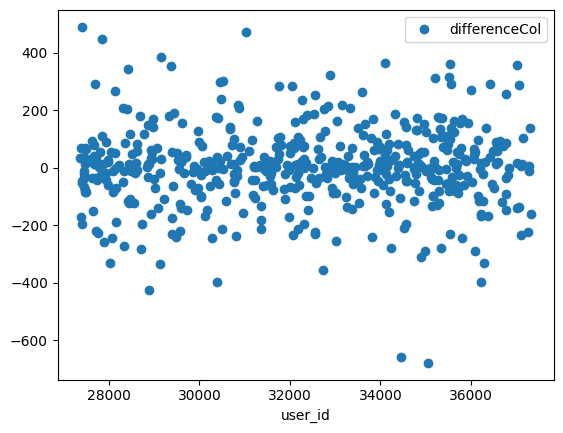

In [27]:
df_users.info()
df_users['differenceCol']= df_users['Minutes3']-df_users['Minutes1']
df_users.plot(x='user_id', y='differenceCol', style='o')

In [28]:
df_users['Minutes2'] = df_users['Minutes2'].fillna((df_users['Minutes1'] +df_users['Minutes3'])/2)
df_users

,user_id,Premium,Minutes1,Minutes2,Minutes3,differenceCol
0,33616,True,1136,1193.316025,1250.632049,114.632049
1,32048,True,2011,2152.677708,2294.355415,283.355415
2,29095,True,1486,1416.316384,1346.632769,-139.367231
3,32106,False,131,135.819997,140.639993,9.639993
4,31885,True,929,874.636650,820.273301,-108.726699
...,...,...,...,...,...,...
507,37330,True,1614,1534.250613,1454.501225,-159.498775
508,27499,True,901,858.918433,816.836866,-84.163134
509,29149,True,672,687.794032,703.588064,31.588064
510,30768,False,438,837.000000,537.447662,99.447662


##### user_behavior.csv

**Task**: Read the *user_behavior.csv* file.

In [42]:
user_behavior = pd.read_csv("user_behavior.csv", delimiter=";")
user_behavior

,user_id,song_id,num_clicks,ml,g,f,mod,artists
0,29158,55060,64,251.982460,Rock,1,2023-09-22,662
1,33692,5080,63,260.001056,Pop,0,2023-08-14,4937
2,31198,25839,24,105.355020,Hip-Hop,1,2023-06-24,6289
3,33302,87341,36,142.085267,Electronic,0,2023-07-22,1356
4,34592,47110,74,301.314994,Pop,0,2023-04-28,8373
...,...,...,...,...,...,...,...,...
9995,29529,61631,59,233.774341,Hip-Hop,0,2023-07-23,4102
9996,31337,36418,55,238.032765,Rock,1,2023-06-15,3619
9997,27988,46895,88,351.861677,Pop,0,2023-05-12,6043
9998,33334,56043,11,43.287063,Rock,0,2023-06-10,7299


**Task**: Rename the columns according to the description in the exercise sheet.

In [43]:
user_behavior.rename(columns={'ml' : 'minListened'}, inplace=True)
user_behavior.rename(columns={"g" : "genre"}, inplace=True)
user_behavior.rename(columns={"f" : "liked"}, inplace=True)
user_behavior.rename(columns={"mod" : "reviewDate"}, inplace=True)
user_behavior


,user_id,song_id,num_clicks,minListened,genre,liked,reviewDate,artists
0,29158,55060,64,251.982460,Rock,1,2023-09-22,662
1,33692,5080,63,260.001056,Pop,0,2023-08-14,4937
2,31198,25839,24,105.355020,Hip-Hop,1,2023-06-24,6289
3,33302,87341,36,142.085267,Electronic,0,2023-07-22,1356
4,34592,47110,74,301.314994,Pop,0,2023-04-28,8373
...,...,...,...,...,...,...,...,...
9995,29529,61631,59,233.774341,Hip-Hop,0,2023-07-23,4102
9996,31337,36418,55,238.032765,Rock,1,2023-06-15,3619
9997,27988,46895,88,351.861677,Pop,0,2023-05-12,6043
9998,33334,56043,11,43.287063,Rock,0,2023-06-10,7299


**Task:** Fix the data types of the attributes *Genre* (categorical) and *Favorite* (binary, categorical).

In [45]:
user_behavior['genre'] = user_behavior['genre'].astype('category')
user_behavior['liked'] = user_behavior['liked'].astype('bool')
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   user_id      10000 non-null  int64   
 1   song_id      10000 non-null  int64   
 2   num_clicks   10000 non-null  int64   
 3   minListened  10000 non-null  float64 
 4   genre        10000 non-null  category
 5   liked        10000 non-null  bool    
 6   reviewDate   10000 non-null  object  
 7   artists      10000 non-null  int64   
dtypes: bool(1), category(1), float64(1), int64(4), object(1)
memory usage: 489.1+ KB


**Task:** Some genres have more songs than others. Adjust the data set such that it includes only the four largest genres and the genre "Other" that summarizes all remaining genres.

<Axes: xlabel='genre'>

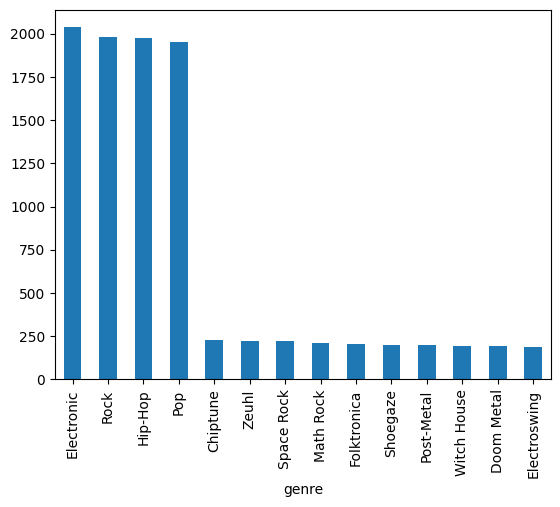

In [46]:
genreCount = user_behavior['genre'].value_counts()
genreCount.plot(kind='bar')

<Axes: xlabel='genre'>

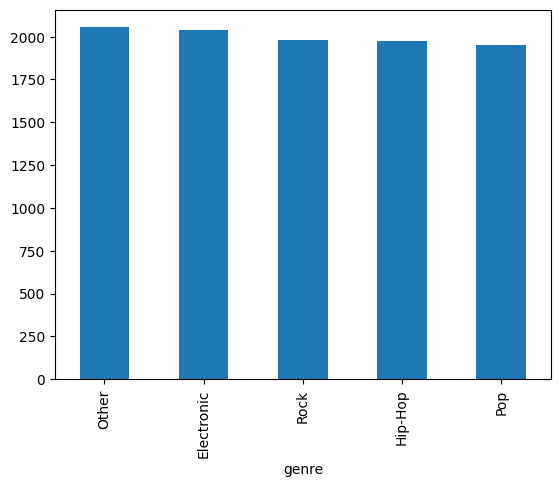

In [50]:
user_behavior['genre'] = user_behavior['genre'].map({'Electronic':'Electronic', 'Rock': 'Rock', 'Hip-Hop':'Hip-Hop', 'Pop':'Pop'}).fillna('Other')
user_behavior['genre']= user_behavior['genre'].astype('category')

genreCount = user_behavior['genre'].value_counts()
genreCount.plot(kind='bar')

**Task:** Create for a new column for the weekday, year, month, and day of each date names *ModifiedAt*.

In [53]:
user_behavior

,user_id,song_id,num_clicks,minListened,genre,liked,reviewDate,artists
0,29158,55060,64,251.982460,Rock,True,2023-09-22,662
1,33692,5080,63,260.001056,Pop,False,2023-08-14,4937
2,31198,25839,24,105.355020,Hip-Hop,True,2023-06-24,6289
3,33302,87341,36,142.085267,Electronic,False,2023-07-22,1356
4,34592,47110,74,301.314994,Pop,False,2023-04-28,8373
...,...,...,...,...,...,...,...,...
9995,29529,61631,59,233.774341,Hip-Hop,False,2023-07-23,4102
9996,31337,36418,55,238.032765,Rock,True,2023-06-15,3619
9997,27988,46895,88,351.861677,Pop,False,2023-05-12,6043
9998,33334,56043,11,43.287063,Rock,False,2023-06-10,7299


In [56]:
user_behavior['reviewDate'] = pd.to_datetime(user_behavior['reviewDate'], format= "%Y-%m-%d")
user_behavior['weekday'] = user_behavior['reviewDate'].dt.day_name()
user_behavior['Year'] = user_behavior['reviewDate'].dt.year
user_behavior['Month'] = user_behavior['reviewDate'].dt.month
user_behavior['Day'] = user_behavior['reviewDate'].dt.day

user_behavior

,user_id,song_id,num_clicks,minListened,genre,liked,reviewDate,artists,weekday,Year,Month,Day
0,29158,55060,64,251.982460,Rock,True,2023-09-22,662,Friday,2023,9,22
1,33692,5080,63,260.001056,Pop,False,2023-08-14,4937,Monday,2023,8,14
2,31198,25839,24,105.355020,Hip-Hop,True,2023-06-24,6289,Saturday,2023,6,24
3,33302,87341,36,142.085267,Electronic,False,2023-07-22,1356,Saturday,2023,7,22
4,34592,47110,74,301.314994,Pop,False,2023-04-28,8373,Friday,2023,4,28
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29529,61631,59,233.774341,Hip-Hop,False,2023-07-23,4102,Sunday,2023,7,23
9996,31337,36418,55,238.032765,Rock,True,2023-06-15,3619,Thursday,2023,6,15
9997,27988,46895,88,351.861677,Pop,False,2023-05-12,6043,Friday,2023,5,12
9998,33334,56043,11,43.287063,Rock,False,2023-06-10,7299,Saturday,2023,6,10


#### artists.csv

**Task**: Read the *artists.csv* file and re-name the columns according to the exercise sheet.

In [72]:
artists = pd.read_csv("artists.csv", delimiter=";")

artists.rename(columns={"featured" : "Featured"}, inplace=True)
artists

,artist_id,genre,Featured,monthly_listeners
0,8497,Error,0,529178
1,3331,Error,0,1319507
2,7097,Rock,0,739339
3,1352,Error,0,127536
4,457,Error,0,387548
...,...,...,...,...
894,1567,Rap,0,650037
895,2143,Rap,0,306317
896,8260,Error,0,1185810
897,2524,Classic,0,276064


**Task:** Convert the attributes *Genre* and *Featured* to categorical variables.

In [73]:
artists['genre'] = artists['genre'].astype('category')
artists['Featured'] = artists['Featured'].astype('category')
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   artist_id          899 non-null    int64   
 1   genre              899 non-null    category
 2   Featured           899 non-null    category
 3   monthly_listeners  899 non-null    int64   
dtypes: category(2), int64(2)
memory usage: 16.3 KB


### Data aggregation

**Task:** Merge the *users* and *user_behavior* tables together. Create a view in which you determine how many minutes a user listens to songs on average. Additionally, what is the highest number of clicks a user had on a song?

In [74]:
user_with_behavior= pd.merge(df_users, user_behavior, on='user_id')
user_with_behavior.groupby('user_id').agg(Average = ('minListened','mean'), MaxClicks = ("num_clicks","max")).reset_index()


,user_id,Average,MaxClicks
0,27367,202.428192,95
1,27378,175.538977,97
2,27393,206.299595,98
3,27395,216.096020,91
4,27397,181.559834,99
...,...,...,...
507,37260,227.883949,99
508,37273,163.418818,98
509,37284,213.932807,96
510,37294,203.551624,98


**Task:** Merge the *user_behavior* and *artist* tables to determine the most clicked artist per genre (defined by the song).

In [75]:
artists_with_behavior= artists.merge(user_behavior, left_on='artist_id', right_on='artists')
artists_with_behavior


,artist_id,genre_x,Featured,monthly_listeners,user_id,song_id,num_clicks,minListened,genre_y,liked,reviewDate,artists,weekday,Year,Month,Day
0,8497,Error,0,529178,32911,86121,5,20.386618,Electronic,False,2023-07-18,8497,Tuesday,2023,7,18
1,8497,Error,0,529178,30443,74135,7,27.359223,Pop,False,2023-04-17,8497,Monday,2023,4,17
2,8497,Error,0,529178,28511,33428,42,172.791426,Electronic,False,2023-04-08,8497,Saturday,2023,4,8
3,3331,Error,0,1319507,30934,48282,8,31.218885,Other,False,2023-06-03,3331,Saturday,2023,6,3
4,7097,Rock,0,739339,31337,70903,60,240.195572,Pop,False,2023-03-31,7097,Friday,2023,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,2524,Classic,0,276064,36809,70857,75,326.399613,Pop,False,2023-02-26,2524,Sunday,2023,2,26
1447,6569,Techno,0,46565,33159,96454,54,227.205410,Rock,False,2023-09-12,6569,Tuesday,2023,9,12
1448,6569,Techno,0,46565,34800,86662,80,296.057365,Rock,True,2023-05-20,6569,Saturday,2023,5,20
1449,6569,Techno,0,46565,31221,74461,39,153.137119,Hip-Hop,False,2023-01-20,6569,Friday,2023,1,20


Question: Why can't we just use artists.merge(user_behavior)?

Answer: 

Which is the most clicked artist per genre of the song?

In [ ]:
group = artists_with_behavior.groupby()

Answer:

**Task**: Determine for each artist, the fan that spends the most minutes listening their music